In [ ]:
# degree
# degree is a parameter used when kernel is set to ‘poly’. 
# It’s basically the degree of the polynomial used to find the hyperplane to split the data.

# Using degree=1 is the same as using a ‘linear’ kernel.
# Also, increasing this parameters leads to higher training times.

In [1]:
import warnings
warnings.filterwarnings('ignore')

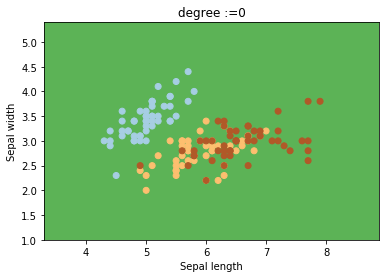

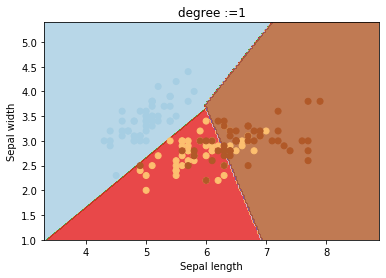

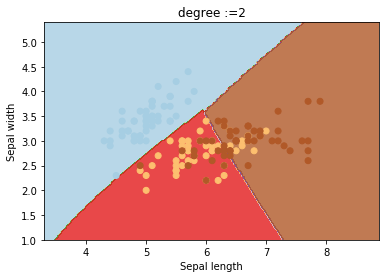

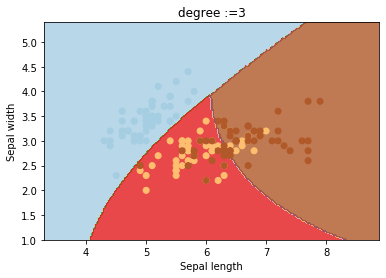

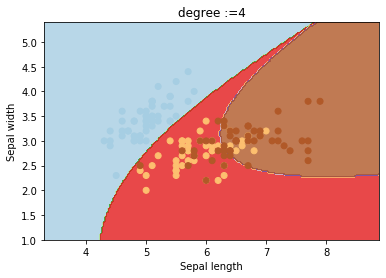

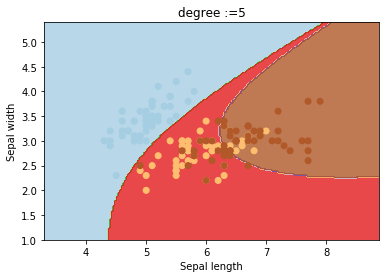

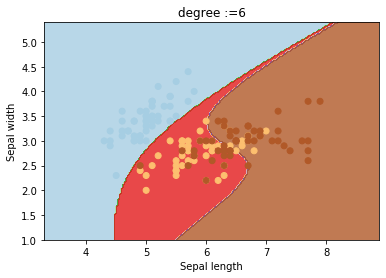

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2]
y = iris.target

# Define the Hyperparamers for Degree
degrees = [0, 1, 2, 3, 4, 5, 6]

for i in degrees:
    
    # Create 'SVC' lienar 
    svc = SVC(kernel="poly",degree=i).fit(X, y)
    
    # Mesh Grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.title("degree :=" + str(i))
    plt.show()